[*********************100%***********************]  1 of 1 completed


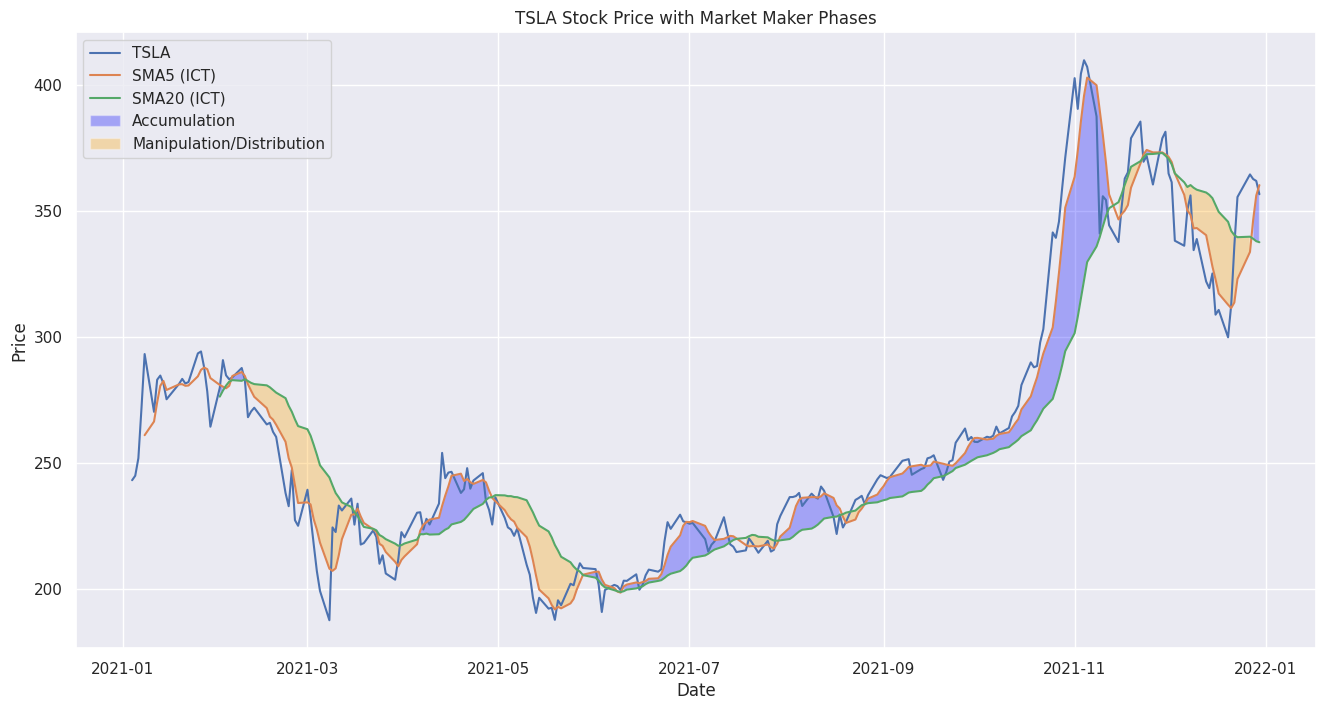

In [5]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Download Tesla Inc. stock data
ticker = "TSLA"
stock_data = yf.download(ticker, start="2021-01-01", end="2021-12-31")

# Calculate ICT's SMAs
stock_data["SMA5"] = calculate_sma(stock_data["Close"], 5)
stock_data["SMA20"] = calculate_sma(stock_data["Close"], 20)

# Define the crossover strategy
stock_data["Signal"] = 0
stock_data.loc[stock_data["SMA5"] > stock_data["SMA20"], "Signal"] = 1
stock_data.loc[stock_data["SMA5"] < stock_data["SMA20"], "Signal"] = -1

# Create a new DataFrame for Seaborn plotting
s_data = stock_data.reset_index()

# Set the plot style
sns.set(style="darkgrid")

# Create a line plot for stock prices and ICT's SMAs
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x="Date", y="Close", data=s_data, label="TSLA", linewidth=1.5)
sns.lineplot(x="Date", y="SMA5", data=s_data, label="SMA5 (ICT)", linewidth=1.5, ax=ax)
sns.lineplot(x="Date", y="SMA20", data=s_data, label="SMA20 (ICT)", linewidth=1.5, ax=ax)

# Highlight market maker phases
ax.fill_between(s_data["Date"], s_data["SMA5"], s_data["SMA20"], where=(s_data["SMA5"] > s_data["SMA20"]), facecolor="blue", alpha=0.3, label="Accumulation")
ax.fill_between(s_data["Date"], s_data["SMA5"], s_data["SMA20"], where=(s_data["SMA5"] < s_data["SMA20"]), facecolor="orange", alpha=0.3, label="Manipulation/Distribution")

# Set axis labels and title
ax.set(xlabel="Date", ylabel="Price")
plt.title("TSLA Stock Price with Market Maker Phases")

# Add legend
plt.legend(loc="upper left")

# Show the plot
plt.show()
